   value  anomaly  is_anomaly
0     10        1       False
1     12        1       False
2     13        1       False
3     12        1       False
4     14        1       False
5     11        1       False
6    990       -1        True
7   1000       -1        True


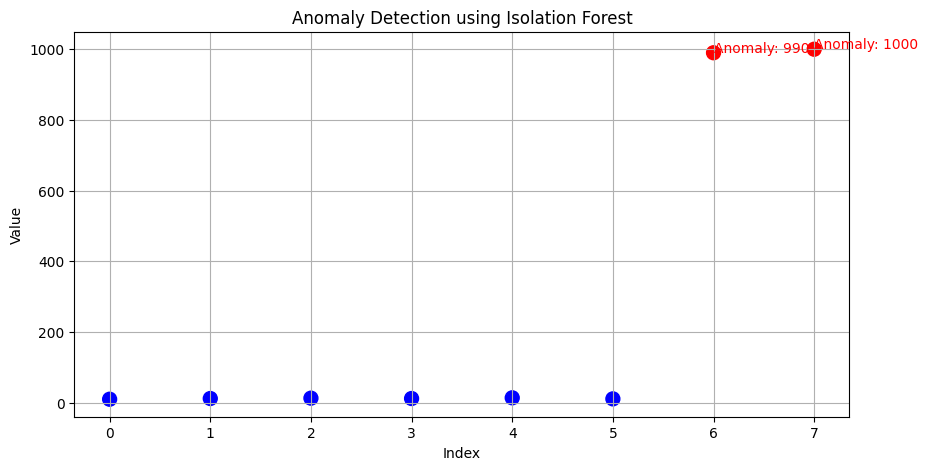

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Create sample data
data = np.array([[10], [12], [13], [12], [14], [11], [990], [1000]])
df = pd.DataFrame(data, columns=["value"])

# Step 2: Fit Isolation Forest
model = IsolationForest(contamination=0.25, random_state=42)
df['anomaly'] = model.fit_predict(df[['value']])  # -1 = anomaly, 1 = normal

# Convert output to True/False
df['is_anomaly'] = df['anomaly'] == -1

# Step 3: Print results
print(df)

# Step 4: Visualization
plt.figure(figsize=(10, 5))
colors = ['red' if x else 'blue' for x in df['is_anomaly']]
plt.scatter(df.index, df['value'], color=colors, s=100)

# Label anomalies
for idx, row in df[df['is_anomaly']].iterrows():
    plt.text(idx, row['value'] + 2, f"Anomaly: {row['value']}", color='red')

plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()
